# Weather and how it relates to cities location

## Prepare Data

In [1]:
# Import libraries.
import pandas as pd
import matplotlib.pyplot as plt
import os
import requests

from scipy import stats

# Import keys.
from api_keys import weather_api_key
from api_keys import g_key

# Dataset location.
cities_json_file_path = os.path.join('Resources', 'city.list.json')


In [2]:
# Read cities dataset.
cities_df = pd.read_json(cities_json_file_path)

cities_coordinates = pd.json_normalize(cities_df['coord'])

cities_df = cities_df.merge(cities_coordinates, left_index=True, right_index=True)
cities_df.drop(columns=['coord'], inplace=True)

cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209579 entries, 0 to 209578
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       209579 non-null  int64  
 1   name     209579 non-null  object 
 2   state    209579 non-null  object 
 3   country  209579 non-null  object 
 4   lon      209579 non-null  float64
 5   lat      209579 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.6+ MB


In [3]:
# Divide cities in four groups.
# Each group will be made using the main imaginary lines dividing the Earth (the Prime meridian and the Equator).

# Cities in the first quadrant (longitude is negative and latitude is positive)
first_quadrant_cities = (cities_df['lon'] < 0) & (cities_df['lat'] > 0)
first_quadrant_cities_df = cities_df.loc[first_quadrant_cities]

# Cities in the second quadrant (both longitude and latitude are positive)
second_quadrant_cities = (cities_df['lon'] > 0) & (cities_df['lat'] > 0)
second_quadrant_cities_df = cities_df.loc[second_quadrant_cities]

# Cities in the third quadrant (both longitude and latitude are negative)
third_quadrant_cities = (cities_df['lon'] < 0) & (cities_df['lat'] < 0)
third_quadrant_cities_df = cities_df.loc[third_quadrant_cities]

# Cities in the fourth quadrant (longitude is positive and latitude is negative)
fourth_quadrant_cities = (cities_df['lon'] > 0) & (cities_df['lat'] < 0)
fourth_quadrant_cities_df = cities_df.loc[fourth_quadrant_cities]


In [4]:
# Get 500 random cities in the world
temp_df = first_quadrant_cities_df.sample(80)
five_hundred_cities = pd.DataFrame(temp_df)

temp_df = second_quadrant_cities_df.sample(80)
five_hundred_cities = five_hundred_cities.append(temp_df)

temp_df = third_quadrant_cities_df.sample(80)
five_hundred_cities = five_hundred_cities.append(temp_df)

temp_df = fourth_quadrant_cities_df.sample(80)
five_hundred_cities = five_hundred_cities.append(temp_df)

five_hundred_cities.reset_index(inplace=True)


## Start calculations and building plots

In [5]:
# Get weather data for all 500 random cities

# Weather API configuration
weather_api_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
weather_data_for_a_city_url = f"{weather_api_url}appid={weather_api_key}&units={units}"

# Loop through the list of cities and perform a request for data on each
for index, city in five_hundred_cities.iterrows(): 
    lat_param = f"&lat={city['lat']}"
    lon_param = f"&lon={city['lon']}"
    
    # Include a print log of each city as it's being processed with the city number and city name.
    print(f"Getting weather information for: {city['id']} - {city['name']}, {city['country']} ... ")
    response = requests.get(weather_data_for_a_city_url + lat_param + lon_param).json()
    print(f"information retrieved.")

    temperature = response['main']['temp']
    humidity = response['main']['humidity']
    cloudiness = response['clouds']['all']
    wind_speed = response['wind']['speed']
    weather_condition = response['weather'][0]['main']
    weather_condition_desc = response['weather'][0]['description']
    
    five_hundred_cities.loc[index, 'temperature'] = temperature
    five_hundred_cities.loc[index, 'humidity'] = humidity
    five_hundred_cities.loc[index, 'cloudiness'] = cloudiness
    five_hundred_cities.loc[index, 'wind_speed'] = wind_speed
    five_hundred_cities.loc[index, 'weather_condition'] = weather_condition
    five_hundred_cities.loc[index, 'weather_condition_desc'] = weather_condition_desc

print(five_hundred_cities.info())

Getting weather information for: 2409663 - Daru, SL ... 
information retrieved.
Getting weather information for: 3115198 - Olarra, ES ... 
information retrieved.
Getting weather information for: 8010471 - Vinhais, PT ... 
information retrieved.
Getting weather information for: 3514592 - Xalpatlahuac, MX ... 
information retrieved.
Getting weather information for: 3676934 - La Unión, CO ... 
information retrieved.
Getting weather information for: 2962884 - Lispole, IE ... 
information retrieved.
Getting weather information for: 2987513 - Peyrehorade, FR ... 
information retrieved.
Getting weather information for: 6138118 - Sainte-Thècle, CA ... 
information retrieved.
Getting weather information for: 2370358 - Quinhámel, GW ... 
information retrieved.
Getting weather information for: 3579907 - Saint Patrick, GD ... 
information retrieved.
Getting weather information for: 2455456 - Kinmparana, ML ... 
information retrieved.
Getting weather information for: 3126854 - Landa, ES ... 
inform

information retrieved.
Getting weather information for: 2977477 - Saint-Pierre-de-Varengeville, FR ... 
information retrieved.
Getting weather information for: 2846023 - Rodenwalde, DE ... 
information retrieved.
Getting weather information for: 3044062 - Tázlár, HU ... 
information retrieved.
Getting weather information for: 7872378 - Fohnsdorf, AT ... 
information retrieved.
Getting weather information for: 2923901 - Fuchsstadt, DE ... 
information retrieved.
Getting weather information for: 2013162 - Respublika Sakha (Yakutiya), RU ... 
information retrieved.
Getting weather information for: 1538636 - Novoural’sk, RU ... 
information retrieved.
Getting weather information for: 2803875 - Zöschen, DE ... 
information retrieved.
Getting weather information for: 256297 - Omorfochóri, GR ... 
information retrieved.
Getting weather information for: 6425879 - Vernoux-en-Vivarais, FR ... 
information retrieved.
Getting weather information for: 1919017 - Jinsanjiao, CN ... 
information retri

information retrieved.
Getting weather information for: 3394910 - Mesota, BR ... 
information retrieved.
Getting weather information for: 3448742 - São José, BR ... 
information retrieved.
Getting weather information for: 3471395 - Artur Nogueira, BR ... 
information retrieved.
Getting weather information for: 3459981 - Jeceaba, BR ... 
information retrieved.
Getting weather information for: 3859082 - Dumesnil, AR ... 
information retrieved.
Getting weather information for: 3461320 - Indaiabira, BR ... 
information retrieved.
Getting weather information for: 3837797 - San Eduardo, AR ... 
information retrieved.
Getting weather information for: 3466723 - Castelo, BR ... 
information retrieved.
Getting weather information for: 3882460 - Los Álamos, CL ... 
information retrieved.
Getting weather information for: 3859904 - Crespo, AR ... 
information retrieved.
Getting weather information for: 3451242 - Rio Branco do Sul, BR ... 
information retrieved.
Getting weather information for: 3929

information retrieved.
Getting weather information for: 2167326 - Emu Vale, AU ... 
information retrieved.
Getting weather information for: 2156343 - Mulgowie, AU ... 
information retrieved.
Getting weather information for: 2151092 - Rosella, AU ... 
information retrieved.
Getting weather information for: 2077347 - Balaklava, AU ... 
information retrieved.
Getting weather information for: 2161427 - Killawarra, AU ... 
information retrieved.
Getting weather information for: 2180831 - Tuakau, NZ ... 
information retrieved.
Getting weather information for: 2192573 - Carters Beach, NZ ... 
information retrieved.
Getting weather information for: 7378418 - Kenari, ID ... 
information retrieved.
Getting weather information for: 2068231 - Koorda, AU ... 
information retrieved.
Getting weather information for: 2167943 - East Ballina, AU ... 
information retrieved.
Getting weather information for: 2178321 - Acacia Ridge, AU ... 
information retrieved.
Getting weather information for: 8015209 - S

In [6]:
five_hundred_cities

,index,id,name,state,country,lon,lat,temperature,humidity,cloudiness,wind_speed,weather_condition,weather_condition_desc
0,56488,2409663,Daru,,SL,-10.840560,7.991940,72.37,98.0,61.0,0.98,Clouds,broken clouds
1,114967,3115198,Olarra,,ES,-2.789230,43.148762,56.44,93.0,40.0,2.24,Clouds,scattered clouds
2,205534,8010471,Vinhais,,PT,-7.040610,41.831039,48.87,94.0,88.0,0.94,Clouds,overcast clouds
3,132967,3514592,Xalpatlahuac,,MX,-98.616669,17.466669,63.43,87.0,20.0,3.65,Clouds,few clouds
4,137412,3676934,La Unión,,CO,-77.131523,1.604500,58.87,79.0,10.0,4.85,Clear,clear sky
...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,53366,2173694,Buaraba Creek,,AU,152.416672,-27.416670,73.53,53.0,40.0,9.17,Clouds,scattered clouds
316,53943,2179867,Waitakere,,NZ,174.544769,-36.851261,58.95,84.0,100.0,7.94,Clouds,overcast clouds
317,1255,160552,Chato,,TZ,31.766939,-2.637780,68.47,56.0,13.0,9.33,Clouds,few clouds
318,53518,2175108,Bodalla,,AU,150.050003,-36.083328,66.99,49.0,27.0,4.00,Clouds,scattered clouds


### Scatter plots

In [7]:
# Get middle point
def get_middle_point(a_series):
    middle = ((a_series.max() + a_series.min() ) / 2)
    return middle

# Print scatter plot and save the plot as an image
def print_scatter_plot_with_regression_equation(x_series, y_series, marker, title, y_label, x_label, file_name, regress_values = None, line_eq = None):
    
    # Build scatter plot
    plt.scatter(x_series, y_series, marker = marker)
    
    if regress_values is not None:
        # Build line equation and annotate it to the scatter plot
        plt.plot(x_series, regress_values, "r-")
        plt.annotate(line_eq, (get_middle_point(x_series), get_middle_point(y_series)), fontsize = 15, color = "red")
    
    # Incorporate the other graph properties
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.grid(True)
    
    # Save the figure
    plt.savefig("output/" + file_name)
    
    # Show plot
    plt.show()

# Perform linear regression. Return regressed values, the linear equation and the r-value
def linear_regression_with_equation(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_equation = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    
    return regress_values, line_equation

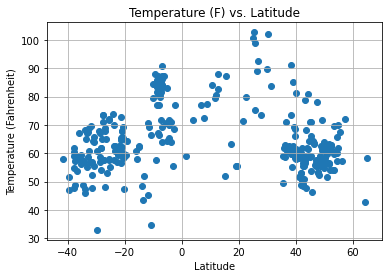

In [8]:
# Temperature (F) vs. Latitude

print_scatter_plot_with_regression_equation(
    five_hundred_cities["lat"],
    five_hundred_cities["temperature"],
    "o",
    "Temperature (F) vs. Latitude",
    "Temperature (Fahrenheit)",
    "Latitude",
    "TemperatureVSLatitude.png"
)

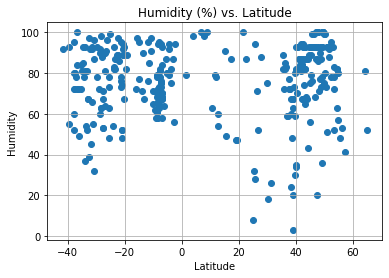

In [9]:
# Humidity (%) vs. Latitude

print_scatter_plot_with_regression_equation(
    five_hundred_cities["lat"],
    five_hundred_cities["humidity"],
    "o",
    "Humidity (%) vs. Latitude",
    "Humidity",
    "Latitude",
    "HumidityVSLatitude.png"
)

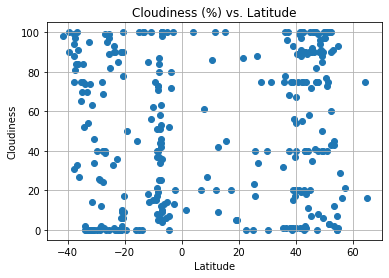

In [10]:
# Cloudiness (%) vs. Latitude

print_scatter_plot_with_regression_equation(
    five_hundred_cities["lat"],
    five_hundred_cities["cloudiness"],
    "o",
    "Cloudiness (%) vs. Latitude",
    "Cloudiness",
    "Latitude",
    "CloudinessVSLatitude.png"
)

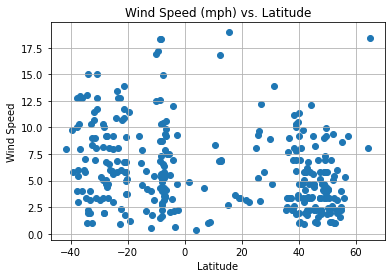

In [11]:
# Wind Speed (mph) vs. Latitude

print_scatter_plot_with_regression_equation(
    five_hundred_cities["lat"],
    five_hundred_cities["wind_speed"],
    "o",
    "Wind Speed (mph) vs. Latitude",
    "Wind Speed",
    "Latitude",
    "WindSpeedVSLatitude.png"
)

### Linear regression calculation by Hemisphere plots

In [12]:
# Divide cities by hemispheres

northern_hemisphere_df = five_hundred_cities.loc[five_hundred_cities['lat'] > 0]
southern_hemisphere_df = five_hundred_cities.loc[five_hundred_cities['lat'] < 0]


The r-squared is: 0.25251496338338636


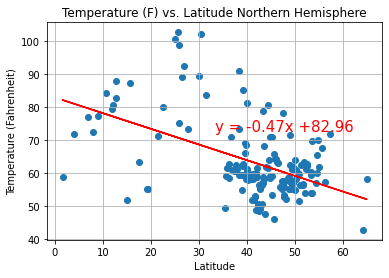

The r-squared is: 0.40423230994130066


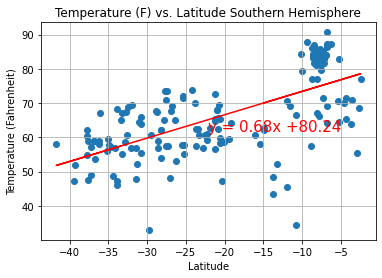

In [13]:
# Perform a linear regression on temperature vs. latitude for the northern hemisphere

(regress_values, line_eq) = linear_regression_with_equation(
    northern_hemisphere_df["lat"], 
    northern_hemisphere_df["temperature"]
)

# Scatter plot and Linear Equation
print_scatter_plot_with_regression_equation(
    northern_hemisphere_df["lat"],
    northern_hemisphere_df["temperature"],
    "o",
    "Temperature (F) vs. Latitude Northern Hemisphere",
    "Temperature (Fahrenheit)",
    "Latitude",
    "TemperatureVSLatitude-NH.png",
    regress_values,
    line_eq
)

# Perform a linear regression on temperature vs. latitude for the southern hemisphere

(regress_values, line_eq) = linear_regression_with_equation(
    southern_hemisphere_df["lat"],
    southern_hemisphere_df["temperature"]
)

# Scatter plot and Linear Equation
print_scatter_plot_with_regression_equation(
    southern_hemisphere_df["lat"],
    southern_hemisphere_df["temperature"],
    "o",
    "Temperature (F) vs. Latitude Southern Hemisphere",
    "Temperature (Fahrenheit)",
    "Latitude",
    "TemperatureVSLatitude-SH.png",
    regress_values,
    line_eq
)


The r-squared is: 0.02029940488296695


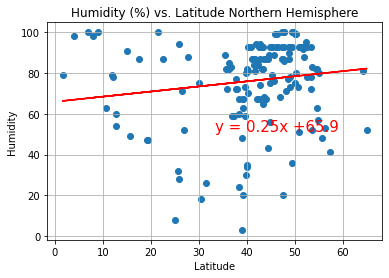

The r-squared is: 0.00023422795050318963


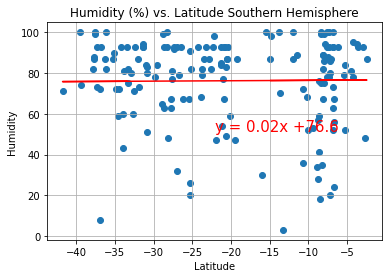

In [14]:
# Perform a linear regression on Humidity (%) vs. latitude for the northern hemisphere
(regress_values, line_eq) = linear_regression_with_equation(
    northern_hemisphere_df["lat"], 
    northern_hemisphere_df["humidity"]
)

# Scatter plot and Linear Equation
print_scatter_plot_with_regression_equation(
    northern_hemisphere_df["lat"],
    northern_hemisphere_df["humidity"],
    "o",
    "Humidity (%) vs. Latitude Northern Hemisphere",
    "Humidity",
    "Latitude",
    "HumidityVSLatitude-NH.png",
    regress_values,
    line_eq
)

# Perform a linear regression on Humidity (%) vs. latitude for the southern hemisphere
(regress_values, line_eq) = linear_regression_with_equation(
    southern_hemisphere_df["lat"],
    southern_hemisphere_df["humidity"]
)

# Scatter plot and Linear Equation
print_scatter_plot_with_regression_equation(
    southern_hemisphere_df["lat"],
    northern_hemisphere_df["humidity"],
    "o",
    "Humidity (%) vs. Latitude Southern Hemisphere",
    "Humidity",
    "Latitude",
    "HumidityVSLatitude-SH.png",
    regress_values,
    line_eq
)

The r-squared is: 0.01938956835113675


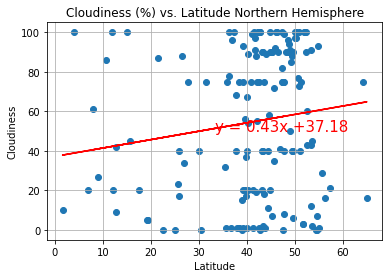

The r-squared is: 0.006158508165701458


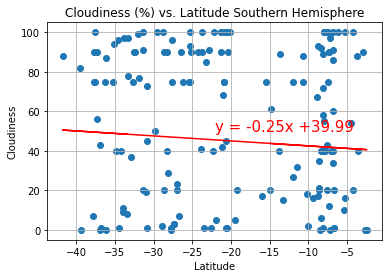

In [15]:
# Perform a linear regression on Cloudiness (%) vs. latitude for the northern hemisphere
(regress_values, line_eq) = linear_regression_with_equation(
    northern_hemisphere_df["lat"], 
    northern_hemisphere_df["cloudiness"]
)

# Scatter plot and Linear Equation
print_scatter_plot_with_regression_equation(
    northern_hemisphere_df["lat"],
    northern_hemisphere_df["cloudiness"],
    "o",
    "Cloudiness (%) vs. Latitude Northern Hemisphere",
    "Cloudiness",
    "Latitude",
    "CloudinessVSLatitude-NH.png",
    regress_values,
    line_eq
)

# Perform a linear regression on Cloudiness (%) vs. latitude for the southern hemisphere
(regress_values, line_eq) = linear_regression_with_equation(
    southern_hemisphere_df["lat"],
    southern_hemisphere_df["cloudiness"]
)

# Scatter plot and Linear Equation
print_scatter_plot_with_regression_equation(
    southern_hemisphere_df["lat"],
    northern_hemisphere_df["cloudiness"],
    "o",
    "Cloudiness (%) vs. Latitude Southern Hemisphere",
    "Cloudiness",
    "Latitude",
    "CloudinessVSLatitude-SH.png",
    regress_values,
    line_eq
)

The r-squared is: 0.016164663615931628


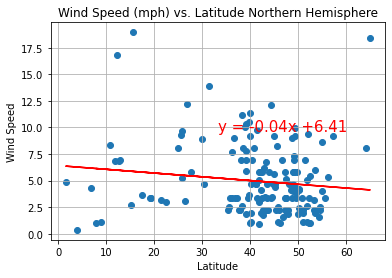

The r-squared is: 0.011987823272782975


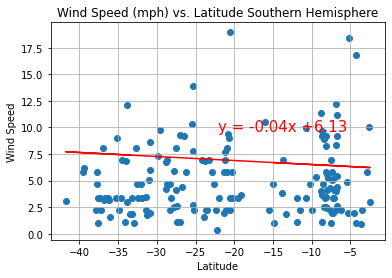

In [16]:
# Perform a linear regression on Wind Speed (mph) vs. latitude for the northern hemisphere
(regress_values, line_eq) = linear_regression_with_equation(
    northern_hemisphere_df["lat"], 
    northern_hemisphere_df["wind_speed"]
)

# Scatter plot and Linear Equation
print_scatter_plot_with_regression_equation(
    northern_hemisphere_df["lat"],
    northern_hemisphere_df["wind_speed"],
    "o",
    "Wind Speed (mph) vs. Latitude Northern Hemisphere",
    "Wind Speed",
    "Latitude",
    "WindSpeedVSLatitude-NH.png",
    regress_values,
    line_eq
)

# Perform a linear regression on Wind Speed (%) vs. latitude for the southern hemisphere
(regress_values, line_eq) = linear_regression_with_equation(
    southern_hemisphere_df["lat"],
    southern_hemisphere_df["wind_speed"]
)

# Scatter plot and Linear Equation
print_scatter_plot_with_regression_equation(
    southern_hemisphere_df["lat"],
    northern_hemisphere_df["wind_speed"],
    "o",
    "Wind Speed (mph) vs. Latitude Southern Hemisphere",
    "Wind Speed",
    "Latitude",
    "WindSpeedVSLatitude-SH.png",
    regress_values,
    line_eq
)